In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ydata_profiling as profiling
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from scipy import stats

In [2]:
world_health=pd.read_csv(r'happiness_score_dataset.csv')

In [3]:
world_health

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
world_health.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
world_health.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
world_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
world_health.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
world_health.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [9]:
#wh=world_health.profile_report()
#wh

# Untill this point we understand that there are no null values. we also see that there are 158 records across 12 columns which shows how the happiness can be impacted.
#there are 10 numeric columns and 2 object colums.

In [10]:
world_health.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
world_h=world_health.rename({'Country':'country', 'Region': 'region', 'Happiness Rank':'happiness_rank', 'Happiness Score':'happiness_score',
    'Standard Error':'standard_error', 'Economy (GDP per Capita)':'economy_gdp', 'Family':'family',
       'Health (Life Expectancy)':'health_lifexp', 'Freedom':"freedom", 'Trust (Government Corruption)':'govt corruption',
       'Generosity':'generosity', 'Dystopia Residual':'Dystopia_residual'})

In [12]:
world_h

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
#world_health.replace({'Country':'country', 'Region': 'region', 'Happiness Rank':'happiness_rank', 'Happiness Score':'happiness_score',
       #'Standard Error':'standard_error', 'Economy (GDP per Capita)':'economy_gdp', 'Family':'family',
       #'Health (Life Expectancy)':'health_lifexp', 'Freedom':"freedom", 'Trust (Government Corruption)':'govt corruption',
       #'Generosity':'generosity', 'Dystopia Residual':'Dystopia_residual'}, inplace=True)

In [14]:
world_health

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<Axes: >

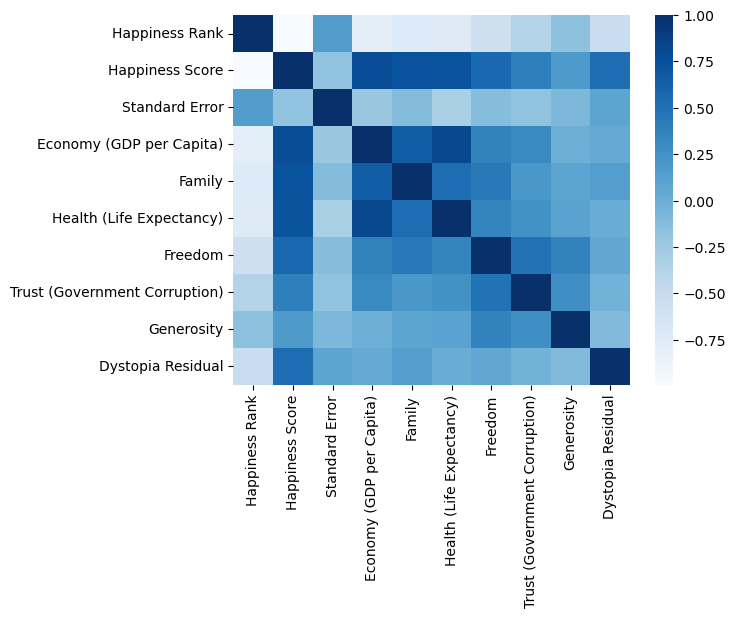

In [15]:
sns.heatmap(world_health.corr(),cmap='Blues')

# The above plotting shows how each parameter is related to the output variable (Happiness Score), All are positvely related to the output except Hapiness rank which is inversely related to the output.

plotting some graphic visualizations for better understanding

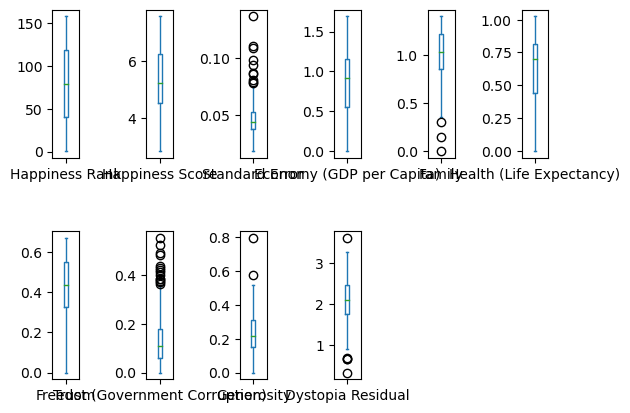

In [16]:
world_health.plot(kind='box',subplots=True,layout=(2,6))
plt.subplots_adjust(wspace=2.5, hspace=0.5)
plt.show()

<Axes: xlabel='Happiness Score', ylabel='Density'>

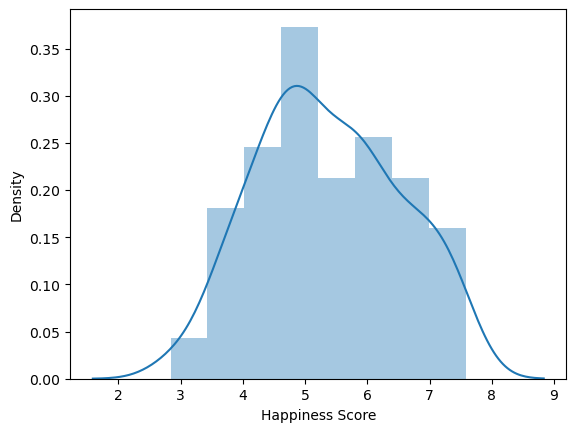

In [17]:
sns.distplot(world_health['Happiness Score'])

<Axes: xlabel='Happiness Score', ylabel='Happiness Rank'>

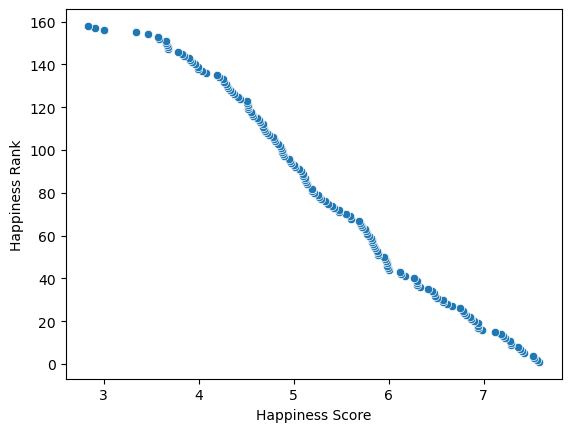

In [18]:
sns.scatterplot(data=world_health, x='Happiness Score',y='Happiness Rank')

<Axes: xlabel='Standard Error', ylabel='Happiness Score'>

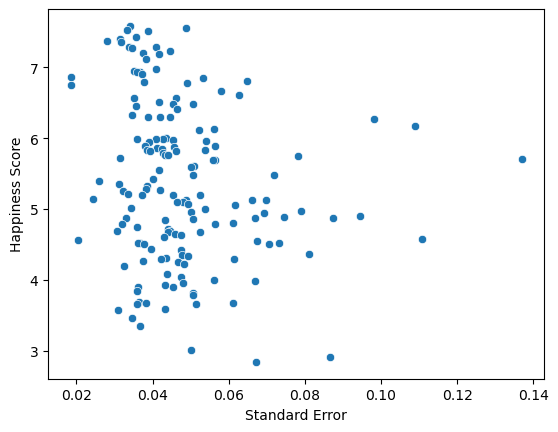

In [19]:
sns.scatterplot(data=world_health, x='Standard Error',y='Happiness Score')

<Axes: xlabel='Family', ylabel='Happiness Score'>

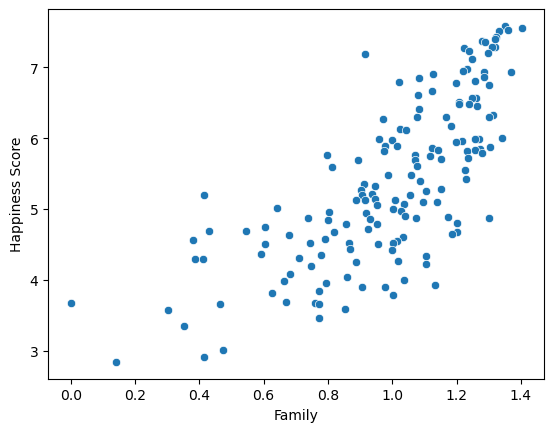

In [20]:
sns.scatterplot(data=world_health, x='Family',y='Happiness Score')

<Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

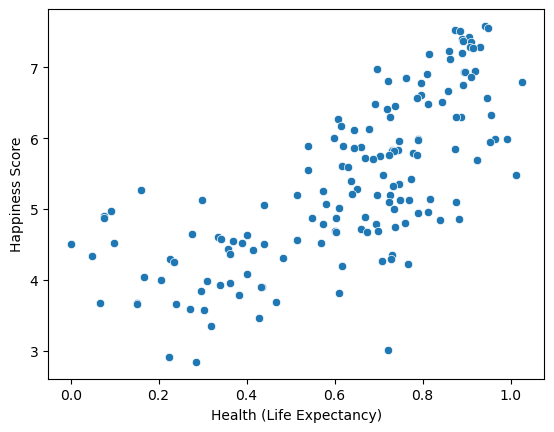

In [21]:
sns.scatterplot(data=world_health, x='Health (Life Expectancy)',y='Happiness Score')

<Axes: xlabel='Freedom', ylabel='Happiness Score'>

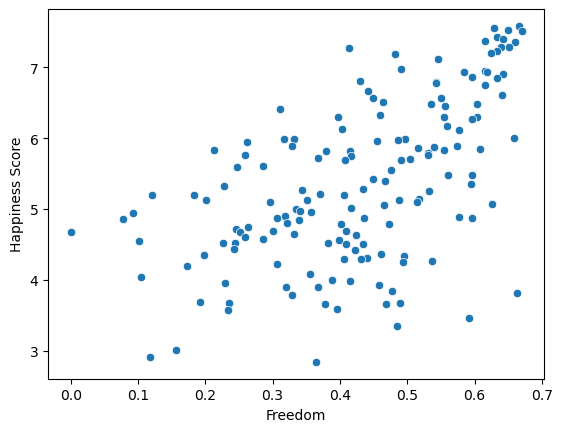

In [22]:
sns.scatterplot(data=world_health, x='Freedom',y='Happiness Score')

<Axes: xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

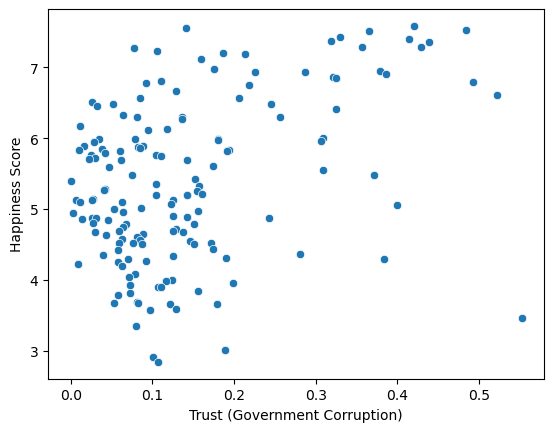

In [23]:
sns.scatterplot(data=world_health, x='Trust (Government Corruption)',y='Happiness Score')

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

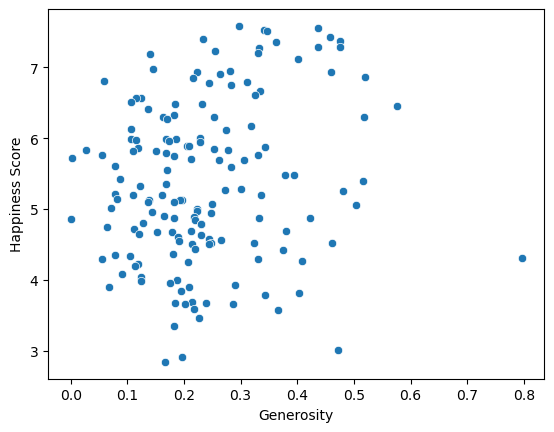

In [24]:
sns.scatterplot(data=world_health, x='Generosity',y='Happiness Score')

<Axes: xlabel='Dystopia Residual', ylabel='Happiness Score'>

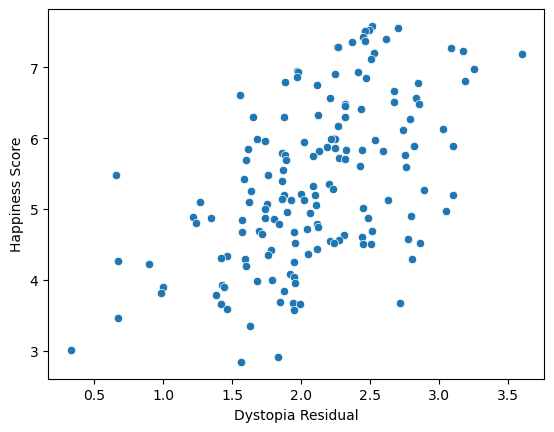

In [25]:
sns.scatterplot(data=world_health, x='Dystopia Residual',y='Happiness Score')

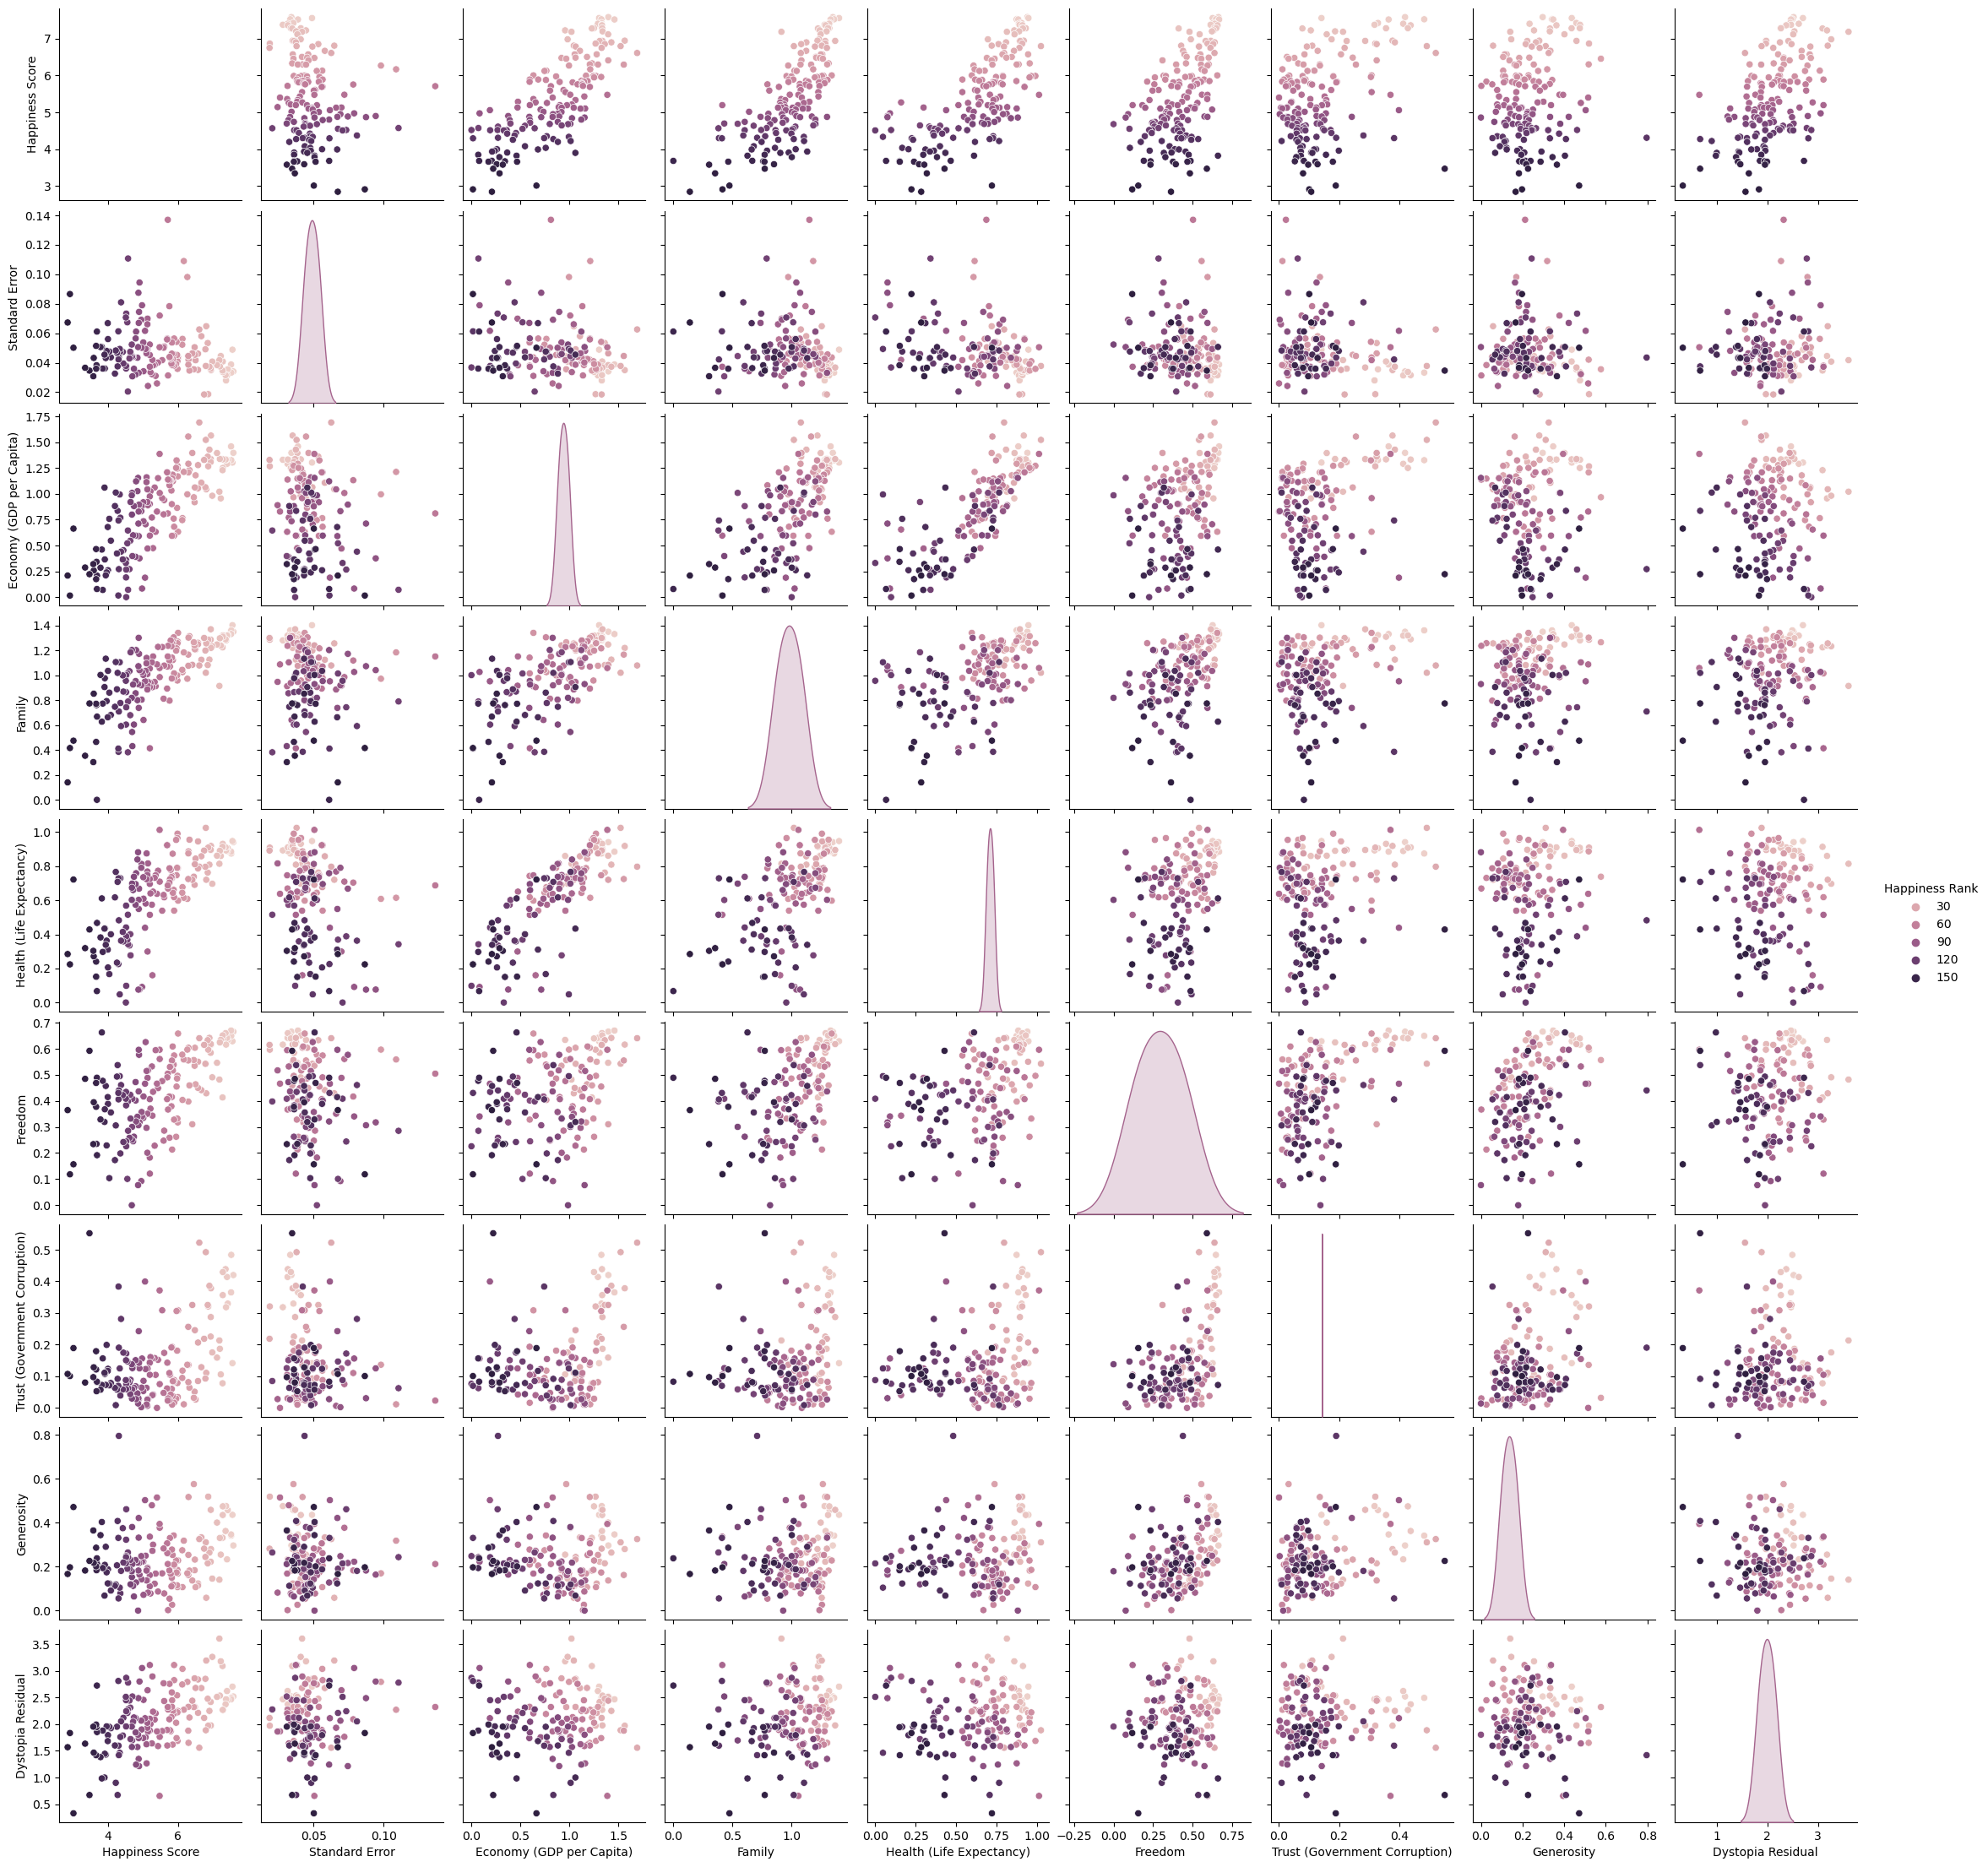

In [26]:
sns.pairplot(world_health,hue='Happiness Rank')

In [27]:
le=LabelEncoder()
world_health['Region']=le.fit_transform(world_health['Region'])
world_health['Country']=le.fit_transform(world_health['Country'])

In [28]:
z_threshold= 3
z_score =stats.zscore(world_health)
outliers=(z_score>z_threshold).any(axis=1)
data=world_health[~outliers]
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#after preparing the data now moving towards training the data with different regression models

In [29]:
x=data.drop('Happiness Score', axis=1)
y=data['Happiness Score']

In [30]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
152    3.575
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 152, dtype: float64

In [31]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
152,0,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [32]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.30, random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(106, 11)
(46, 11)
(106,)
(46,)


#Training the models

In [34]:
model_regression = { 
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor(),
    "XGBoost"           :xgb.XGBRFRegressor()
}

In [35]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
XGBoost trained


In [36]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(x_test, y_test), ".3f")}')

Linear Regression R^2 Score: 1.000
Decision Tree R^2 Score: 0.987
Random Forest R^2 Score: 0.997
Gradient Boosting R^2 Score: 0.996
XGBoost R^2 Score: 0.995


In [37]:
for i, model in model_regression.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')

Linear Regression MAE: 0.000
Decision Tree MAE: 0.086
Random Forest MAE: 0.049
Gradient Boosting MAE: 0.042
XGBoost MAE: 0.054


#As per the outcome of R^2 and MEA Linear is best model

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
pred= lr.predict(x_test)

In [40]:
r2_score(y_test, pred)

0.9999999360111974

In [41]:
import joblib

In [42]:
joblib.dump(lr,"model_lin_lr")

['model_lin_lr']

In [43]:
mod=joblib.load('model_lin_lr')

In [48]:
data = {'Country':38,'Region':1,'Happiness Rank':4, 'Standard Error': 0.23,'Economy (GDP per Capita)':1.45,'Family':1.3,'Health (Life Expectancy)':3,'Freedom':0.67,"Trust (Government Corruption)":0.32,"Generosity":0.25,"Dystopia Residual":2.5}
df=pd.DataFrame(data,index=[0])
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,38,1,4,0.23,1.45,1.3,3,0.67,0.32,0.25,2.5


In [49]:
mod.predict(df)

array([9.48982551])

# END